In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex
from sklearn.preprocessing import OrdinalEncoder
from skfeature.function.similarity_based.fisher_score import fisher_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, log_loss,\
    make_scorer, RocCurveDisplay

In [27]:
# Carichiamo il data set

train_data = pd.read_csv('./data/train.csv', index_col=0)

train_data.info()

train_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test_data = pd.read_csv('./data/test.csv', index_col=0)

test_data.info()

test_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# Decidiamo di eliminare le feature "Cabin" perché è troppo sparsa

train_data.drop('Cabin',axis=1,inplace=True)
train_data.info()

test_data.drop('Cabin',axis=1,inplace=True)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    in

In [30]:
# Eseguiamo l'imputazione dei valori mancanti di "Embarked" usando il valore più frequente

train_data['Embarked'].fillna(train_data.groupby('Embarked')\
                                        .count()['Pclass']\
                                        .idxmax(),
                                        inplace=True)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [32]:
train_data.groupby('Embarked').count()['Pclass']

Embarked
C    168
Q     77
S    646
Name: Pclass, dtype: int64

In [33]:
# Estraiamo i titoli dei nomi dei passeggeri

train_data.insert(3,'Title',train_data['Name']\
                                .apply(lambda x: regex.search(r'.*, (.*?)\. .*',x).group(1)))

train_data

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,NaN,1,2,W./C. 6607,23.4500,S


In [34]:
# Creiamo un dataframe con le età medie per titolo

avg_age = pd.DataFrame(train_data.groupby(['Title'])['Age'].mean())

avg_age.rename(columns={"Age": "Avg_age"},inplace=True)

In [35]:
# Eseguiamo l'inner join tra train_data e avg_age

train_data = train_data.join(avg_age,how='inner',on='Title',rsuffix='_avg')

train_data

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Avg_age
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,S,32.36809
5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,S,32.36809
6,0,3,"Moran, Mr. James",Mr,male,NaN,0,0,330877,8.4583,Q,32.36809
7,0,1,"McCarthy, Mr. Timothy J",Mr,male,54.0,0,0,17463,51.8625,S,32.36809
13,0,3,"Saundercock, Mr. William Henry",Mr,male,20.0,0,0,A/5. 2151,8.0500,S,32.36809
...,...,...,...,...,...,...,...,...,...,...,...,...
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",Col,male,56.0,0,0,13213,35.5000,C,58.00000
695,0,1,"Weir, Col. John",Col,male,60.0,0,0,113800,26.5500,S,58.00000
746,0,1,"Crosby, Capt. Edward Gifford",Capt,male,70.0,1,1,WE/P 5735,71.0000,S,70.00000


In [36]:
# Eseguiamo l'imputazione dell'età mancante con quella media nella stessa riga perché
# l'attuale dataframe è frutto di un inner join

train_data['Age'].fillna(train_data['Avg_age'],inplace=True)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 823
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Title     891 non-null    object 
 4   Sex       891 non-null    object 
 5   Age       891 non-null    float64
 6   SibSp     891 non-null    int64  
 7   Parch     891 non-null    int64  
 8   Ticket    891 non-null    object 
 9   Fare      891 non-null    float64
 10  Embarked  891 non-null    object 
 11  Avg_age   891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [37]:
# Eliminiamo la colonna Age_avg che non serve più

train_data.drop('Avg_age',axis=1,inplace=True)

In [38]:
# Ripetiamo l'intero procedimento separatamente sui dati di test

test_data.insert(3,'Title',test_data['Name']\
                                .apply(lambda x: regex.search(r'.*, (.*?)\. .*',x).group(1)))

test_avg_age = pd.DataFrame(test_data.groupby(['Title'])['Age'].mean())

test_avg_age.rename(columns={"Age": "Avg_age"},inplace=True)

test_data = test_data.join(test_avg_age,how='inner',on='Title',rsuffix='_avg')

test_data['Age'].fillna(test_data['Avg_age'],inplace=True)

test_data.info()

test_data.drop('Avg_age',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1306
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Title     418 non-null    object 
 4   Age       417 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Embarked  418 non-null    object 
 10  Avg_age   417 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


In [39]:
test_avg_age

,Avg_age
Title,
Col,50.000000
Dona,39.000000
Dr,53.000000
Master,7.406471
Miss,21.774844
Mr,32.000000
Mrs,38.903226
Ms,NaN
Rev,35.500000


In [40]:
test_data[test_data['Title']=='Ms']

,Pclass,Name,Sex,Title,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
980,3,"O'Donoghue, Ms. Bridget",female,Ms,NaN,0,0,364856,7.75,Q


In [41]:
# Inseriamo nella cella 'Age' della riga 980 il valor medio di test_avg_age calcolato per il titolo 'Miss'

test_data.loc[980,'Age'] = test_avg_age.loc['Miss','Avg_age']

test_data[test_data['Title']=='Ms']

,Pclass,Name,Sex,Title,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
980,3,"O'Donoghue, Ms. Bridget",female,Ms,21.774844,0,0,364856,7.75,Q


In [42]:
# Calcoliamo il daraframe delle tariffe medie per classe di imbarco

avg_fare = pd.DataFrame(test_data.groupby('Pclass')['Fare'].mean())

avg_fare

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [43]:
# Eseguiamo l'imputazione delle tariffe mancanti seguendo lo stesso schema di Age

test_data = test_data.join(avg_fare, on='Pclass', how='inner', rsuffix='_avg')

test_data['Fare'].fillna(test_data['Fare_avg'],inplace=True)

test_data.drop('Fare_avg', axis=1, inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1306
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Title     418 non-null    object 
 4   Age       418 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      418 non-null    float64
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [44]:
# Decidiamo di non utilizzare "Name" e "Ticket" che hanno poca rilevanza 
# con la sopravvivenza del passeggero

# trasformiamo le feature categoriche in feature numeriche

enc = OrdinalEncoder()

sex_enc = enc.fit_transform(train_data['Sex'].to_numpy().reshape(-1,1))

emb_enc = enc.fit_transform(train_data['Embarked'].to_numpy().reshape(-1,1))

In [45]:
# Inseriamo le nuove feature numeriche nel dataframe di training

train_data.insert(2,'Sex_enc',sex_enc)
train_data.insert(3,'Emb_enc',emb_enc)

train_data

,Survived,Pclass,Sex_enc,Emb_enc,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,,,
1,0,3,1.0,2.0,"Braund, Mr. Owen Harris",Mr,male,22.00000,1,0,A/5 21171,7.2500,S
5,0,3,1.0,2.0,"Allen, Mr. William Henry",Mr,male,35.00000,0,0,373450,8.0500,S
6,0,3,1.0,1.0,"Moran, Mr. James",Mr,male,32.36809,0,0,330877,8.4583,Q
7,0,1,1.0,2.0,"McCarthy, Mr. Timothy J",Mr,male,54.00000,0,0,17463,51.8625,S
13,0,3,1.0,2.0,"Saundercock, Mr. William Henry",Mr,male,20.00000,0,0,A/5. 2151,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,1,1,1.0,0.0,"Simonius-Blumer, Col. Oberst Alfons",Col,male,56.00000,0,0,13213,35.5000,C
695,0,1,1.0,2.0,"Weir, Col. John",Col,male,60.00000,0,0,113800,26.5500,S
746,0,1,1.0,2.0,"Crosby, Capt. Edward Gifford",Capt,male,70.00000,1,1,WE/P 5735,71.0000,S


In [46]:
# Calcoliamo la matrice di correlazione tra le feature per iniziare la nostra procedura
# di feature selection

corr = train_data[['Pclass','Sex_enc','Emb_enc','Age','Fare','Parch','SibSp','Survived']].corr()

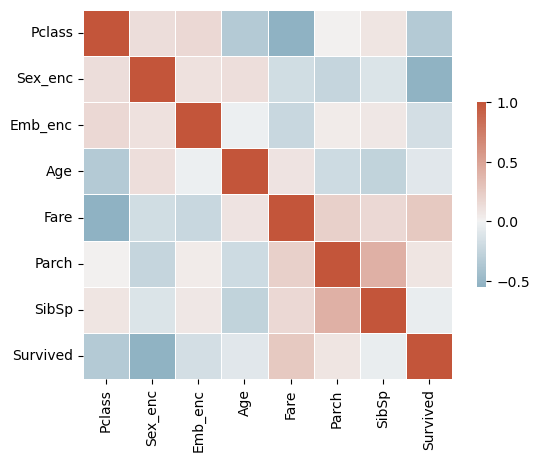

In [47]:
# Creiamo il grafico della matrice di correlazione con seaborn

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths= .5, cbar_kws={'shrink': .5})

plt.show()

In [48]:
# Creiamo una colonna FamilySize ottenuta come Parch + SibSp + 1

train_data.insert(4,'FamilySize',train_data[['Parch','SibSp']]\
                  .apply(lambda x: np.sum(x)+1, axis=1))

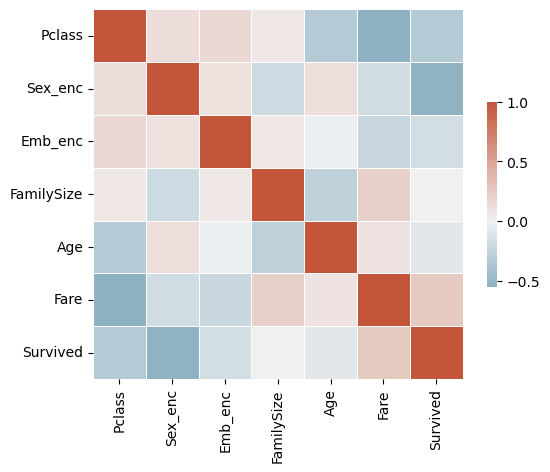

In [49]:
# Creiamo il grafico della matrice di correlazione con seaborn

corr = train_data[['Pclass','Sex_enc','Emb_enc','FamilySize','Age','Fare','Survived']].corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths= .5, cbar_kws={'shrink': .5})

plt.show()

In [50]:
# Determiniamo la matrice dei dati X e il vettore delle etichette y

X = train_data[['Pclass','Sex_enc','Emb_enc','FamilySize','Age','Fare']].to_numpy()

y = train_data['Survived'].to_numpy()

In [51]:
# Creiamo lo score delle feature con l'indice di Fisher

fisher_ranks = SelectKBest(fisher_score, k=6).fit(X,y)

labels = fisher_ranks\
    .get_feature_names_out(['Pclass','Sex_enc','Emb_enc','FamilySize','Age','Fare'])
    
scores = fisher_ranks.scores_

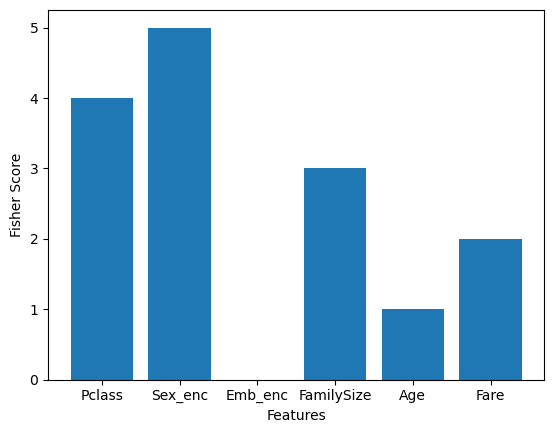

In [52]:
# Facciamo l'istogramma degli score di Fisher
plt.bar(labels, scores)
plt.xlabel('Features')
plt.ylabel('Fisher Score')
plt.show()

In [53]:
# Eseguiamo la reale feature selection impostando il valore di k < 6 e usando il fit_transform

X_new = SelectKBest(fisher_score, k=5).fit_transform(X, y)

In [57]:
# Effettuiamo lo split tra training set e test set ai fini del mero addestramento
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)

# Griglia degli ipeeparametri e di tutti gli argomenti che voglio condizionare chiamando il mio modello
# che è un Gradient Boosting con DT come base learner
params = {
    
    "n_estimators": [200],
    "validation_fraction": [0.05, 0.075, 0.1],
    "n_iter_no_change": [10],
    "tol": [0.01],
    "max_depth": [None],
    "subsample": [0.5, 0.67, 0.8],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "min_samples_leaf": [1],
    "random_state": [42]
    
}

scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'F1': make_scorer(f1_score),
    'Bal. Acc.': make_scorer(balanced_accuracy_score),
    'Log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)
}

grid = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=params,
    scoring=scoring,
    return_train_score=True,
    cv=None,
    refit='Accuracy'
)

grid.fit(X_train,y_train)

classifier = grid.best_estimator_

In [60]:
# Stampiamo gli iperparametri selezionati
hyper = classifier.get_params()

print(f"Validation set: {hyper['validation_fraction']*100:2.0f}% del data set\nLearning rate: {hyper['learning_rate']}\nFrazione di campionamento: {hyper['subsample']*100:2.0f}% del data set")

Validation set: 10% del data set
Learning rate: 0.05
Frazione di campionamento: 50% del data set


In [61]:
print(f"Training accuracy: {grid.best_score_:5.4f}")

Training accuracy: 0.8190


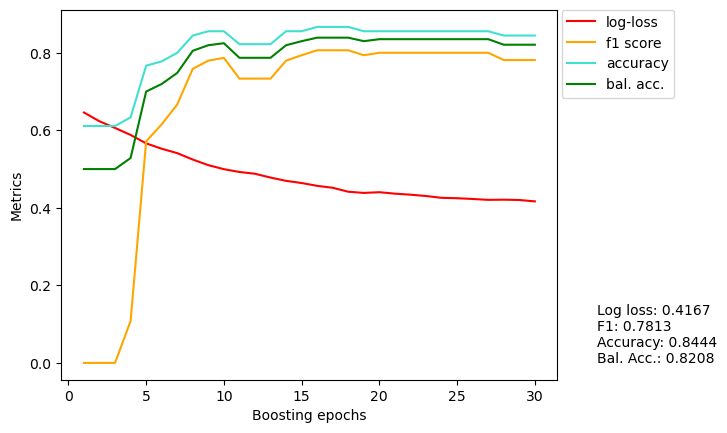

In [63]:
# creiamo il plot delle metriche
epochs = np.arange(classifier.n_estimators_)+1

metric_labels = ['log-loss','f1 score', 'accuracy', 'bal. acc.']

metrics = np.zeros((4,classifier.n_estimators_), dtype=np.float64)

for i, y_proba in enumerate(classifier.staged_predict_proba(X_test)):
    metrics[0,i] = log_loss(y_test, y_proba[:,1])

for i, y_class in enumerate(classifier.staged_predict(X_test)):
    metrics[1,i] = f1_score(y_test, y_class)
    metrics[2,i] = accuracy_score(y_test, y_class)
    metrics[3,i] = balanced_accuracy_score(y_test, y_class)

metric_strings = f"Log loss: {metrics[0,-1]:5.4f}\n\
F1: {metrics[1,-1]:5.4f}\n\
Accuracy: {metrics[2,-1]:5.4f}\n\
Bal. Acc.: {metrics[3,-1]:5.4f}"

plt.plot(epochs, metrics[0], '-', color='red', label=metric_labels[0])
plt.plot(epochs, metrics[1], '-', color='orange', label=metric_labels[1])
plt.plot(epochs, metrics[2], '-', color='turquoise', label=metric_labels[2])
plt.plot(epochs, metrics[3], '-', color='green', label=metric_labels[3])

plt.xlabel('Boosting epochs')
plt.ylabel('Metrics')
plt.legend(loc="upper right",bbox_to_anchor=(1.25, 1.02))
plt.text(34, 0.0, metric_strings)

plt.show()